In [1]:
import pandas as pd

Load data

In [2]:
data = pd.read_csv('/content/mini_data.csv')

Show n headlines of data

In [3]:
data.head(5)

ID   Age     Sex  Height      Grade Good-looking
0   1  21.0    Male   171.0       Good          Yes
1   2  20.0    Male   170.0        Bad           No
2   3  19.0  Female     NaN        Bad           No
3   4  17.0    Male   165.0  Excellent          Yes
4   5   NaN  Female   166.0       Good          Yes

Show all

In [4]:
data

ID   Age     Sex  Height      Grade Good-looking
0    1  21.0    Male   171.0       Good          Yes
1    2  20.0    Male   170.0        Bad           No
2    3  19.0  Female     NaN        Bad           No
3    4  17.0    Male   165.0  Excellent          Yes
4    5   NaN  Female   166.0       Good          Yes
5    6   NaN  Female   180.0  Excellent          Yes
6    7  30.0    Male   170.0       Good           No
7    8  60.0    Male     NaN        Bad           No
8    9  20.0  Female   167.0        NaN          Yes
9   10  21.0    Male   290.0       Good          Yes
10  11  22.0  Female   190.0        NaN           No
11  12   NaN    Male   163.0        NaN          Yes

Check missing values

In [5]:
countNULL = data.isna().sum()
countNULL

ID              0
Age             3
Sex             0
Height          2
Grade           3
Good-looking    0
dtype: int64

In [6]:
null_columns = countNULL[countNULL > 0]
null_columns

Age       3
Height    2
Grade     3
dtype: int64

Remove rows that have 'nan' values

In [ ]:
data_new = data.dropna(inplace=False)
data_new.reset_index(drop=True, inplace=True)

In [ ]:
data_new

ID   Age   Sex  Height      Grade Good-looking
0   1  21.0  Male   171.0       Good          Yes
1   2  20.0  Male   170.0        Bad           No
2   4  17.0  Male   165.0  Excellent          Yes
3   7  30.0  Male   170.0       Good           No
4  10  21.0  Male   290.0       Good          Yes

In [ ]:
mean_age = int(data['Age'].mean())
mean_age

25

In [ ]:
median_height = data['Height'].median()
median_height

170.0

In [ ]:
mode_grade = data['Grade'].mode()[0]
mode_grade

'Good'

In [ ]:
data['Age'].fillna(value=mean_age, inplace=True)
data['Height'].fillna(value=median_height, inplace=True)
data['Grade'].fillna(value=mode_grade, inplace=True)

In [ ]:
data

ID   Age     Sex  Height      Grade Good-looking
0    1  21.0    Male   171.0       Good          Yes
1    2  20.0    Male   170.0        Bad           No
2    3  19.0  Female   170.0        Bad           No
3    4  17.0    Male   165.0  Excellent          Yes
4    5  25.0  Female   166.0       Good          Yes
5    6  25.0  Female   180.0  Excellent          Yes
6    7  30.0    Male   170.0       Good           No
7    8  60.0    Male   170.0        Bad           No
8    9  20.0  Female   167.0       Good          Yes
9   10  21.0    Male   290.0       Good          Yes
10  11  22.0  Female   190.0       Good           No
11  12  25.0    Male   163.0       Good          Yes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


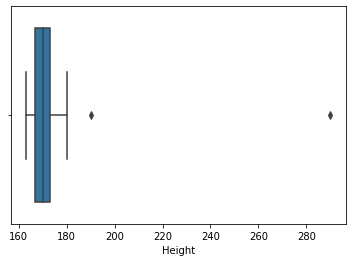

In [ ]:
import seaborn as sbn
sbn.boxplot(data['Height'])

In [ ]:
Q1 = data['Height'].quantile(0.25)
Q3 = data['Height'].quantile(0.75)
IQR = Q3 - Q1
IQR
print(Q1, Q3)

166.75 173.25


In [ ]:
low_fence = Q1 - (1.5 * IQR)
up_fence = Q3 + (1.5 * IQR)
print(low_fence)
print(up_fence)

157.0
183.0


In [ ]:
import numpy as np
list_x = np.arange(1, 12)
list_x[-1] = 12
print(list_x)
print(np.quantile(list_x, 0.25))
print(np.quantile(list_x, 0.5))
print(np.quantile(list_x, 0.75))

[ 1  2  3  4  5  6  7  8  9 10 12]
3.5
6.0
8.5


In [ ]:
data[((data['Height'] < low_fence)|(data['Height'] > up_fence))]

ID   Age     Sex  Height Grade Good-looking
9   10  21.0    Male   290.0  Good          Yes
10  11  22.0  Female   190.0  Good           No

In [ ]:
data = data[~((data['Height'] < low_fence)|(data['Height'] > up_fence))]
data.reset_index(drop=True, inplace=True)
data

ID   Age     Sex  Height      Grade Good-looking
0   1  21.0    Male   171.0       Good          Yes
1   2  20.0    Male   170.0        Bad           No
2   3  19.0  Female   170.0        Bad           No
3   4  17.0    Male   165.0  Excellent          Yes
4   5  25.0  Female   166.0       Good          Yes
5   6  25.0  Female   180.0  Excellent          Yes
6   7  30.0    Male   170.0       Good           No
7   8  60.0    Male   170.0        Bad           No
8   9  20.0  Female   167.0       Good          Yes
9  12  25.0    Male   163.0       Good          Yes

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ID   Age  Sex  Height      Grade Good-looking
0   1  21.0    1   171.0       Good          Yes
1   2  20.0    1   170.0        Bad           No
2   3  19.0    0   170.0        Bad           No
3   4  17.0    1   165.0  Excellent          Yes
4   5  25.0    0   166.0       Good          Yes
5   6  25.0    0   180.0  Excellent          Yes
6   7  30.0    1   170.0       Good           No
7   8  60.0    1   170.0        Bad           No
8   9  20.0    0   167.0       Good          Yes
9  12  25.0    1   163.0       Good          Yes

In [ ]:
print(label_encoder.classes_)

['Female' 'Male']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

In [ ]:
column = 'Grade'

In [ ]:
data_new_column = one_hot_encoder.fit_transform(data[[column]])
data_new_column

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
help(label_encoder.fit_transform)

Help on method fit_transform in module sklearn.preprocessing._label:

fit_transform(y) method of sklearn.preprocessing._label.LabelEncoder instance
    Fit label encoder and return encoded labels.
    
    Parameters
    ----------
    y : array-like of shape (n_samples,)
        Target values.
    
    Returns
    -------
    y : array-like of shape (n_samples,)
        Encoded labels.



In [ ]:
new_column = pd.DataFrame(data=data_new_column, columns=one_hot_encoder.get_feature_names([column]))
new_column

In [ ]:
data = pd.concat([data.drop(columns=[column, 'Good-looking']), new_column, data['Good-looking']], axis=1)
data

ID   Age  Sex  Height  Grade_Bad  Grade_Excellent  Grade_Good Good-looking
0   1  21.0    1   171.0        0.0              0.0         1.0          Yes
1   2  20.0    1   170.0        1.0              0.0         0.0           No
2   3  19.0    0   170.0        1.0              0.0         0.0           No
3   4  17.0    1   165.0        0.0              1.0         0.0          Yes
4   5  25.0    0   166.0        0.0              0.0         1.0          Yes
5   6  25.0    0   180.0        0.0              1.0         0.0          Yes
6   7  30.0    1   170.0        0.0              0.0         1.0           No
7   8  60.0    1   170.0        1.0              0.0         0.0           No
8   9  20.0    0   167.0        0.0              0.0         1.0          Yes
9  12  25.0    1   163.0        0.0              0.0         1.0          Yes

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [ ]:
data[['Age']] = min_max_scaler.fit_transform(data[['Age']])
data

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [ ]:
data[['Height']] = std_scaler.fit_transform(data[['Height']])
data

ID       Age  Sex    Height  Grade_Bad  Grade_Excellent  Grade_Good  \
0   1  0.093023    1  0.409091        0.0              0.0         1.0   
1   2  0.069767    1  0.181818        1.0              0.0         0.0   
2   3  0.046512    0  0.181818        1.0              0.0         0.0   
3   4  0.000000    1 -0.954545        0.0              1.0         0.0   
4   5  0.186047    0 -0.727273        0.0              0.0         1.0   
5   6  0.186047    0  2.454545        0.0              1.0         0.0   
6   7  0.302326    1  0.181818        0.0              0.0         1.0   
7   8  1.000000    1  0.181818        1.0              0.0         0.0   
8   9  0.069767    0 -0.500000        0.0              0.0         1.0   
9  12  0.186047    1 -1.409091        0.0              0.0         1.0   

  Good-looking  
0          Yes  
1           No  
2           No  
3          Yes  
4          Yes  
5          Yes  
6           No  
7           No  
8          Yes  
9          Yes

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Good-looking', 'ID'])
y = data['Good-looking']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
X_train

Age  Sex    Height  Grade_Bad  Grade_Excellent  Grade_Good
0  0.093023    1  0.409091        0.0              0.0         1.0
7  1.000000    1  0.181818        1.0              0.0         0.0
2  0.046512    0  0.181818        1.0              0.0         0.0
9  0.186047    1 -1.409091        0.0              0.0         1.0
4  0.186047    0 -0.727273        0.0              0.0         1.0
3  0.000000    1 -0.954545        0.0              1.0         0.0
6  0.302326    1  0.181818        0.0              0.0         1.0

In [ ]:
iris_dataset = pd.read_csv('/content/iris_dataset.csv')

In [ ]:
iris_dataset

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [ ]:
X = iris_dataset.drop(columns=['species'])
y = iris_dataset['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
X_train

sepal_length  sepal_width  petal_length  petal_width
81            5.5          2.4           3.7          1.0
133           6.3          2.8           5.1          1.5
137           6.4          3.1           5.5          1.8
75            6.6          3.0           4.4          1.4
109           7.2          3.6           6.1          2.5
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[105 rows x 4 columns]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3, p=2)

In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [ ]:
array = np.array([1, 2, 3, 4.5, 5, 6, 7, 8, 9, 10, 11, 1200])
print(np.quantile(array, 0.25))
print(np.quantile(array, 0.5))
print(np.quantile(array, 0.75))
print(np.mean(array))

4.125
6.5
9.25
105.54166666666667
